# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
!jupyter nbconvert --to script mini-project-IV.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook mini-project-IV.ipynb to script
[NbConvertApp] Writing 26287 bytes to mini-project-IV.py


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
import copy
df_copy = copy.deepcopy(df)

In [4]:
len(df)

614

In [5]:
null = df.columns[df.isnull().any()].tolist()

In [6]:
df[null].dtypes

Gender               object
Married              object
Dependents           object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
dtype: object

In [7]:
df[null].isnull().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

Look at some basic statistics for numerical variables.

In [8]:
df[df.dtypes[df.dtypes != 'object'].index].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [9]:
cat_val_counts = {var: df[var].value_counts() for var in df.dtypes[df.dtypes == 'object'].index}

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [10]:
for key in list(cat_val_counts.keys())[1:]:
    print(f'column: {key}\n', cat_val_counts[key], '\n\n')

column: Gender
 Male      489
Female    112
Name: Gender, dtype: int64 


column: Married
 Yes    398
No     213
Name: Married, dtype: int64 


column: Dependents
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 


column: Education
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64 


column: Self_Employed
 No     500
Yes     82
Name: Self_Employed, dtype: int64 


column: Property_Area
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 


column: Loan_Status
 Y    422
N    192
Name: Loan_Status, dtype: int64 




### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [11]:
import seaborn as sns

In [12]:
#import matplotlib.style as style
#style.available

In [13]:
sns.set_theme(style="ticks", font_scale=2, context='notebook')
sns.despine()

<Figure size 432x288 with 0 Axes>

### Look at box plots to understand the distributions. 

### Look at the histogram and boxplot of LoanAmount

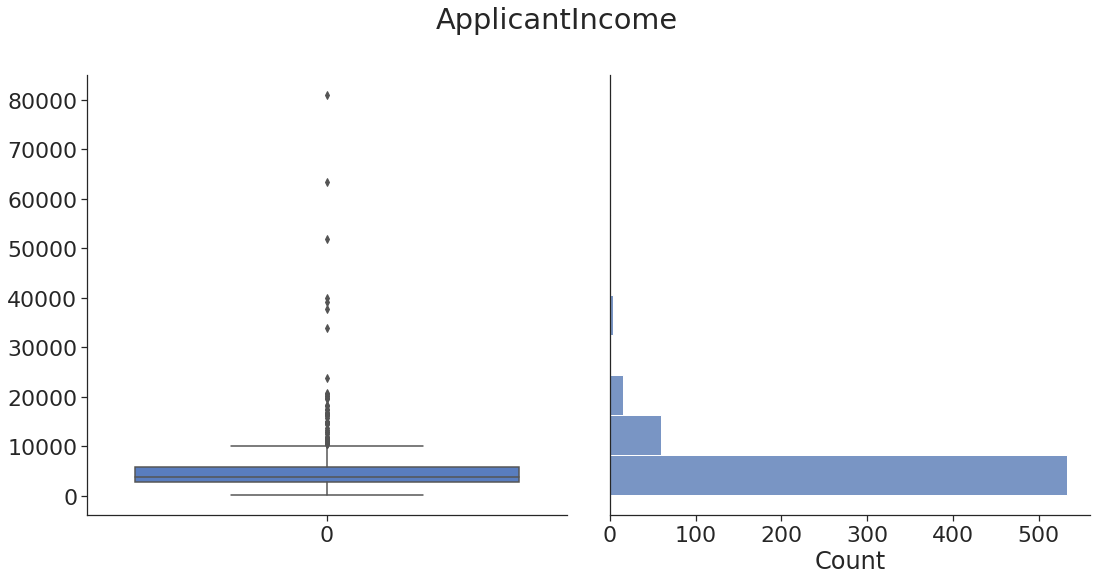

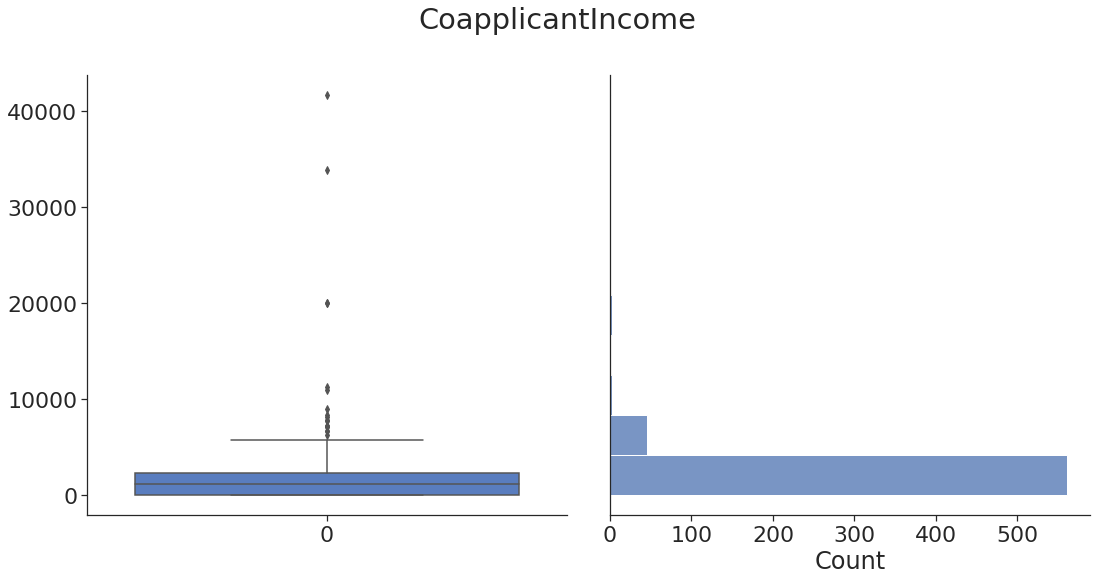

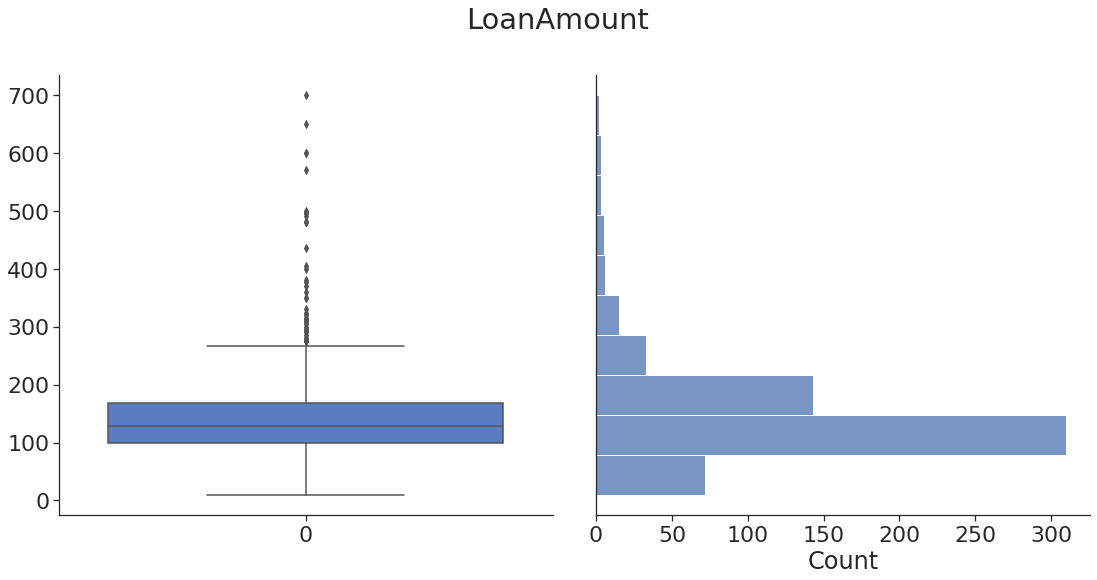

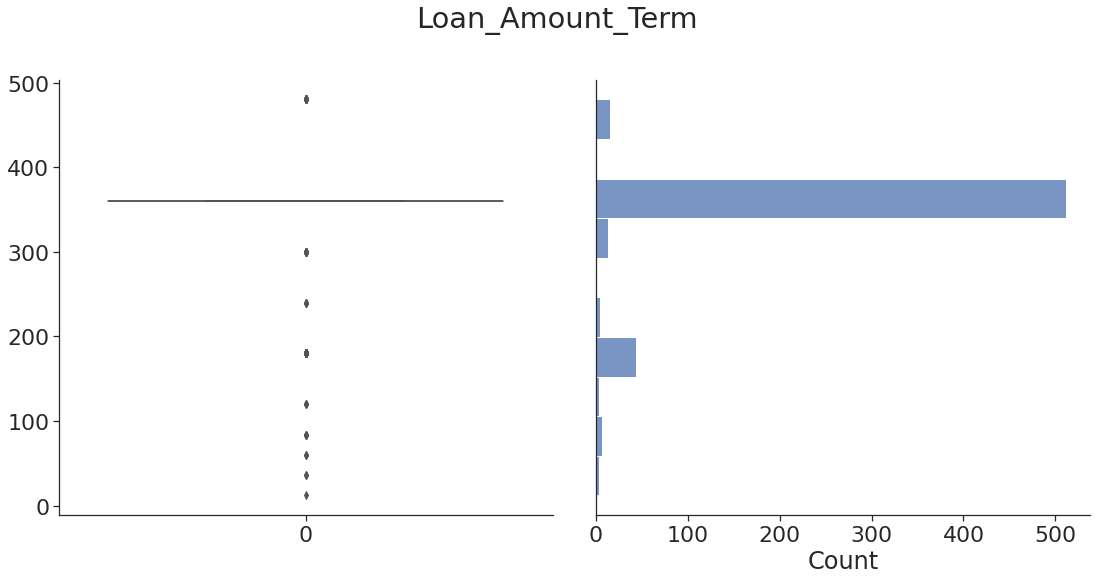

<Figure size 1152x576 with 0 Axes>

In [14]:
for col in df.dtypes[df.dtypes != 'object'].index.tolist():
    fig = plt.figure(figsize=(16,8))
    if df[col].nunique() > 2:
        plt.suptitle(col)
        
        plt.subplot(1,2,1)
        sns.boxplot(data=df[col], palette='muted')#.set(title=col)
        sns.despine()
        
        plt.subplot(1,2,2)
        #plt.ylabel('')
        sns.despine()
        #plt.gca().spines['left'].set_visible(False)
        #plt.gca().spines['right'].set_color('none')
        #plt.gca().spines['top'].set_color('none')
        plt.gca().axes.get_yaxis().set_visible(False)
        
        plt.tight_layout()
        sns.histplot(y=df[col], bins=10, palette='pastel')#.set(title=col, ylabel='')
        plt.savefig(f'{col}.png')

### Look at the distribution of income segregated  by `Education`

In [15]:
grad = df[df.Education == 'Graduate']
not_grad = df[df.Education == 'Not Graduate']

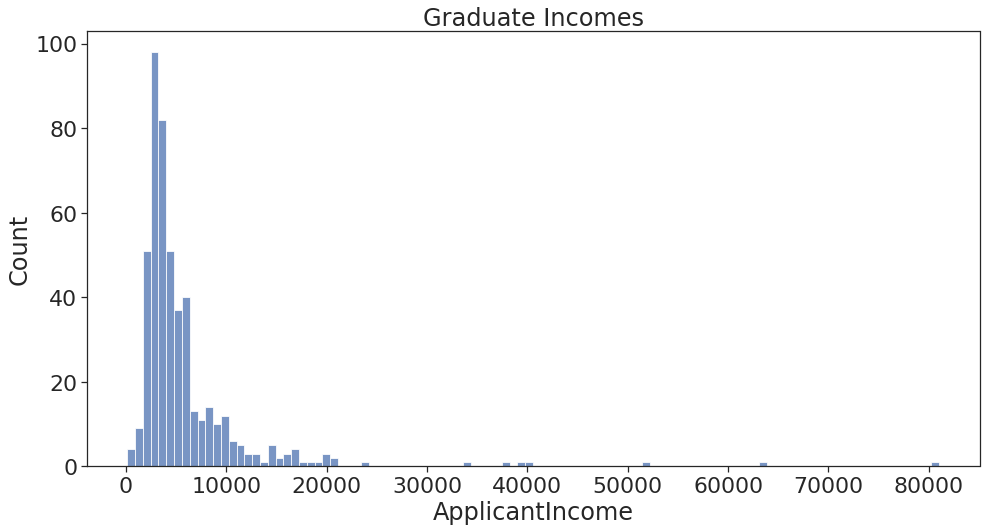

In [16]:
sns.set_theme(style="ticks", font_scale=2, context='notebook')
#sns.set_context("paper")
plt.figure(figsize=(16,8))
sns.histplot(data=grad['ApplicantIncome'],palette='bright').set(title='Graduate Incomes')
plt.savefig(f'GradIncomes.png')

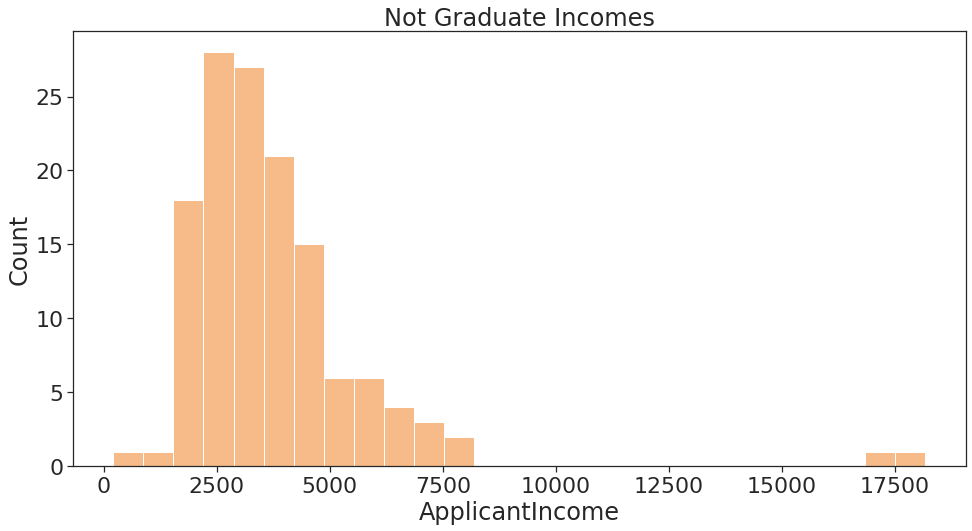

In [17]:
plt.figure(figsize=(16,8))
sns.histplot(data=not_grad['ApplicantIncome'], color='sandybrown', palette='tab10').set(title='Not Graduate Incomes')
plt.savefig(f'NONGradIncomes.png')

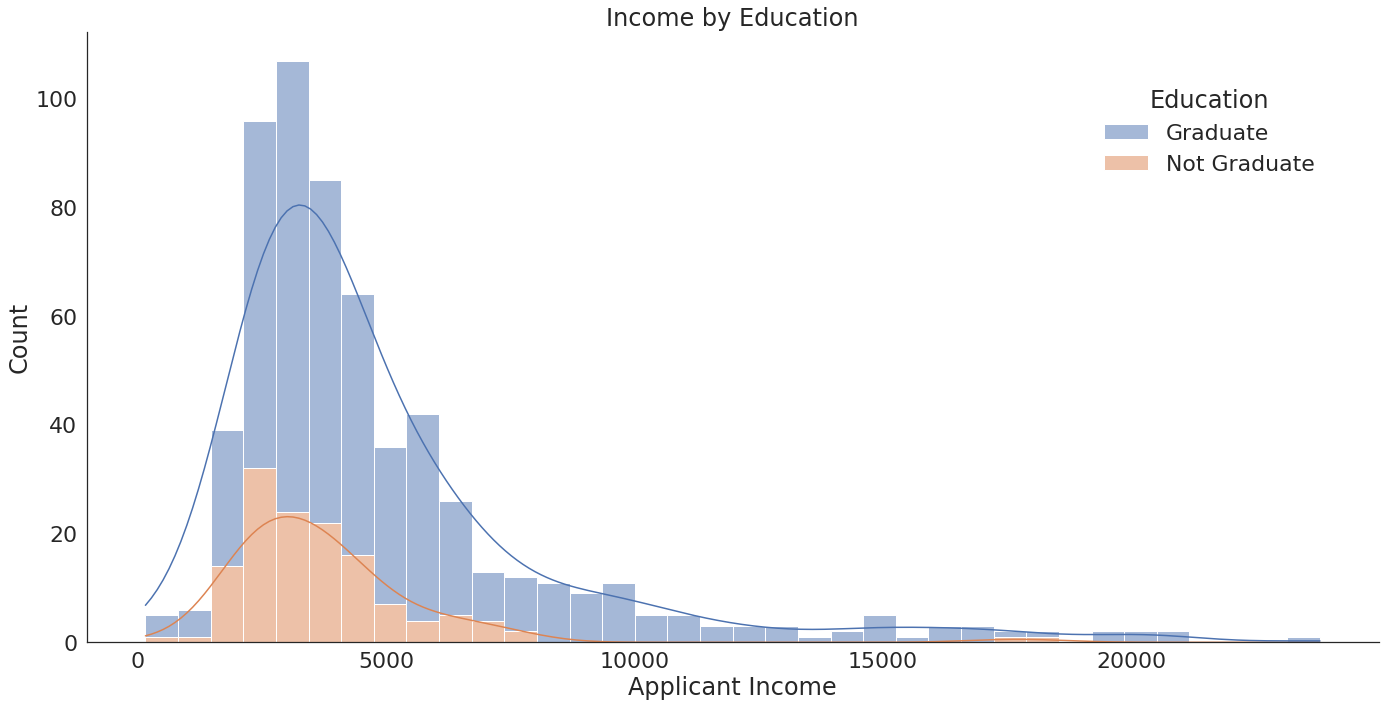

In [18]:
with sns.plotting_context("poster"):
    sns.set(font_scale=2, style='white')
    hist = sns.displot(df[df.ApplicantIncome < 30000], x="ApplicantIncome", hue="Education", kde=True, multiple="stack", height=10, aspect=2).set(title='Income by Education', xlabel='Applicant Income')
    hist.legend.set_bbox_to_anchor((0.8, 0.8))
    plt.savefig(f'IncomebyEd.png')

In [19]:
num = df.columns[df.dtypes != object].tolist()

In [20]:
df_corr = df[num].corr()

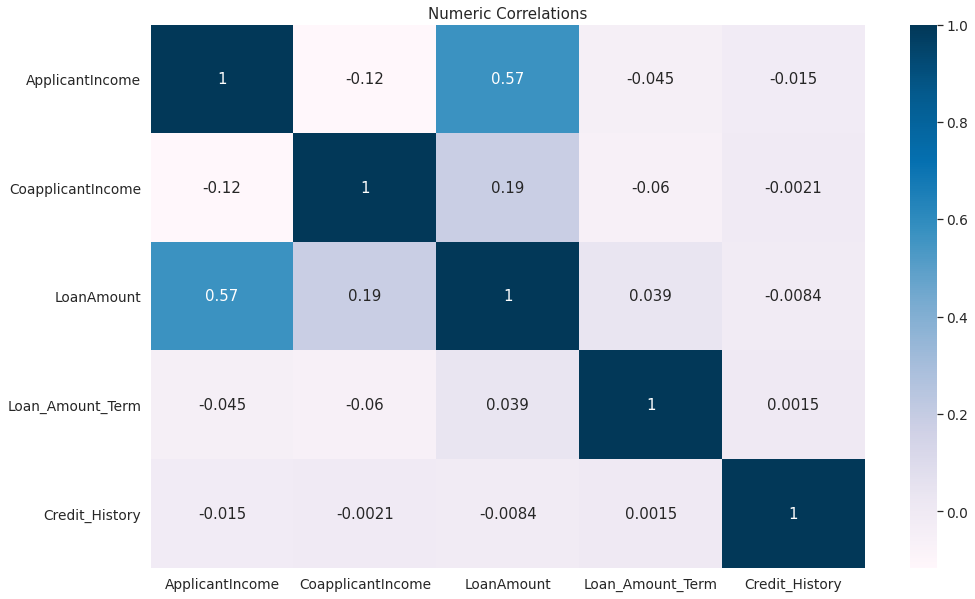

In [21]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.25)
sns.color_palette('pastel')
num_hm = sns.heatmap(df_corr, annot=True, cmap="PuBu").set(title='Numeric Correlations')
# only real correlation is between LoanAmount and ApplicantIncome
plt.savefig(f'HeatNum.png')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [22]:
obj = df.columns[df.dtypes == object].tolist()

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
df.pivot_table(index='Gender', columns='Loan_Status', values='ApplicantIncome', aggfunc='count')
# 1/3 of those that ask for loans are approved - regardless of gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [25]:
df.pivot_table(index='Gender', columns='Loan_Status', values='LoanAmount', aggfunc='mean')
# gender not a determinant of loan amount

Loan_Status,N,Y
Gender,,
Female,128.694444,125.712329
Male,157.878571,145.612121


In [26]:
df.pivot_table(index='Education', columns='Loan_Status', values='LoanAmount', aggfunc='mean')
# on average those that got approved asked for less
# those who graduated asked for and were approved for more than those not graduated

Loan_Status,N,Y
Education,,
Graduate,161.388060,151.093656
Not Graduate,122.234043,116.162500


In [27]:
df.pivot_table(index='Property_Area', columns='Loan_Status', values='LoanAmount', aggfunc='count')#, margins=True)
# much higher likelihood of approval if live in a Semiurban location

Loan_Status,N,Y
Property_Area,,
Rural,66,107
Semiurban,53,175
Urban,62,129


In [28]:
df.pivot_table(index='Credit_History', columns='Loan_Status', values='LoanAmount', aggfunc='count')#, margins=True)
# Valid credit history a HUGE predictor of Loan approval

Loan_Status,N,Y
Credit_History,,
0.0,78,7
1.0,91,367


In [29]:
df.pivot_table(index='Self_Employed', columns='Loan_Status', values='LoanAmount', aggfunc='count')#, margins=True)
# doesn't seem to be a correlation here

Loan_Status,N,Y
Self_Employed,,
No,148,334
Yes,25,54


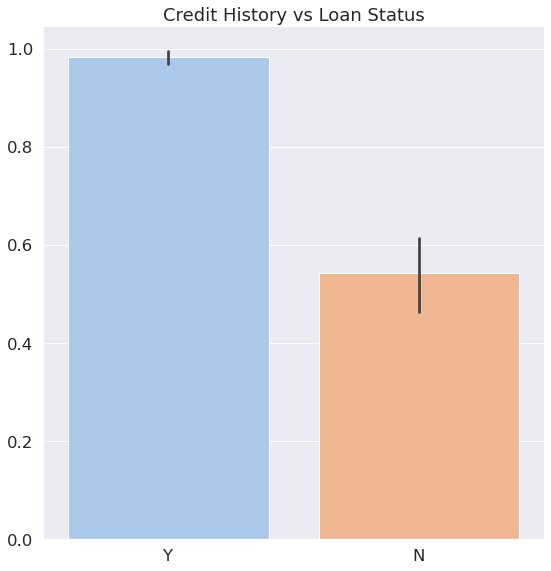

In [30]:
sns.set(font_scale=1.5, palette='pastel')
g = sns.catplot(x='Loan_Status', y='Credit_History', data=df, kind='bar', height=8, aspect=1)
g.set(title="Credit History vs Loan Status", ylabel='', xlabel='')
plt.savefig(f'CredHis_V_Loans.png')

In [31]:
df.pivot_table(index='Married', columns='Loan_Status', values='LoanAmount', aggfunc='count')
# Marriage is NOT a strong indicator of loan approval, though majority of applicants are married couples.

Loan_Status,N,Y
Married,,
No,75,131
Yes,106,278


In [32]:
df.pivot_table(index='Married', columns='Property_Area', values='LoanAmount', aggfunc='count')
# Marriage is NOT a strong indicator of loan approval, though majority of applicants are married couples.

Property_Area,Rural,Semiurban,Urban
Married,,,
No,62,78,66
Yes,111,149,124


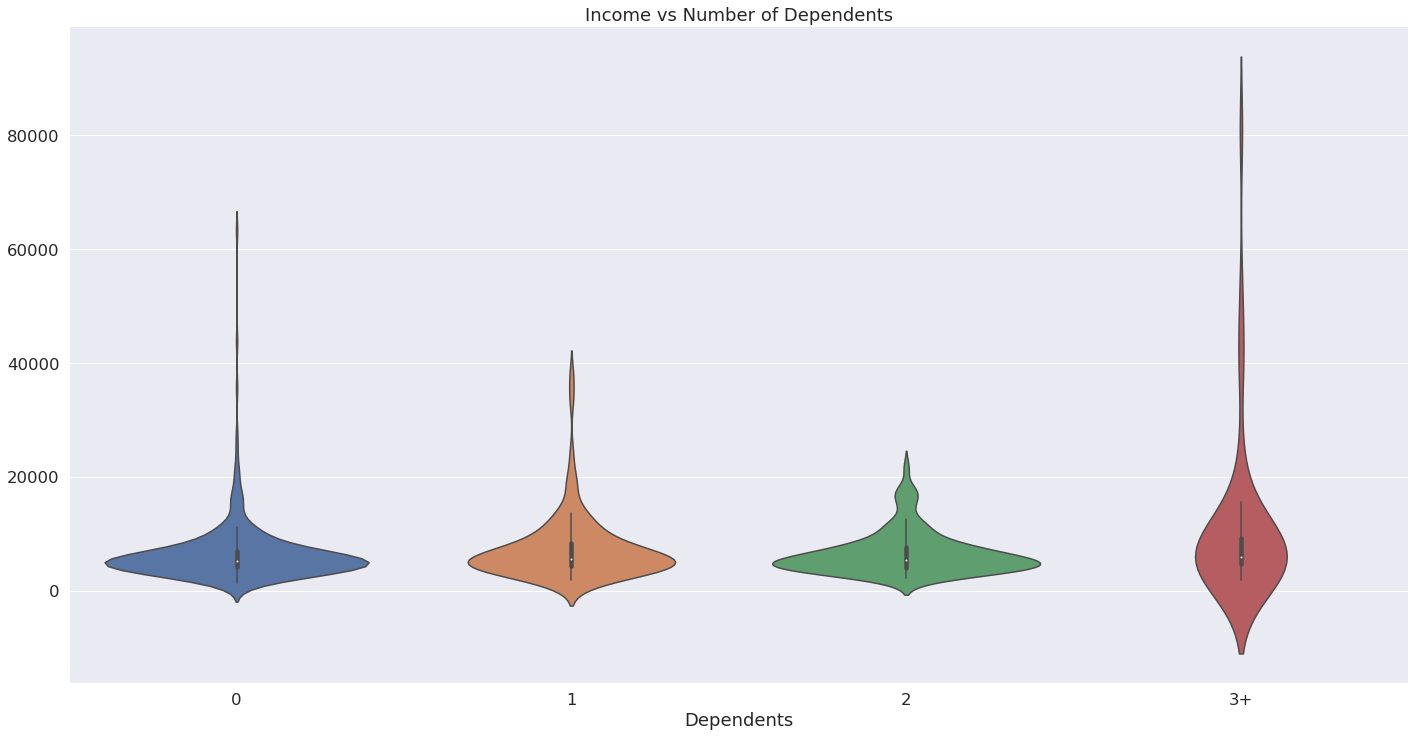

In [33]:
sns.set(font_scale=1.5)
g = sns.catplot(x='Dependents', y=(df['ApplicantIncome']+df['CoapplicantIncome']), data=df, kind='violin', height=10, aspect=2)
g.set(title="Income vs Number of Dependents")

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [34]:
(df == 0).sum(axis=0) # both CoapplicantIncome and Credit_History are okay to be zero.

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64

In [35]:
catCol_null = df.dtypes[(df.dtypes == object) & (df.isnull().any())].index.tolist()
numCol_null = df.dtypes[(df.dtypes != object) & (df.isnull().any())].index.tolist()

In [36]:
print(df[catCol_null].isnull().sum())
print(df[numCol_null].isnull().sum())

Gender           13
Married           3
Dependents       15
Self_Employed    32
dtype: int64
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64


In [37]:
def fill_null(df):
    '''NO NULL dropped all inferred'''
    
    import copy
    df = copy.deepcopy(df)
    
    try:
        df['Gender'] = df['Gender'].fillna(value='Unknown') # new unique class 'Unknown'
    
        # fill these two with most common value (as significantly skewed) + neither appears very predictive of Loan Approval
        for col in ['Married', 'Dependents', 'Self_Employed']:
            df[col] = df[col].fillna(value=(df[col].value_counts().idxmax()))

        # special fillna of LoanAmount (mean of ApplicantIncome bins, since these values reasonably correlate)
        df['ApplicantIncome_logbin'] = pd.cut(np.log(df.ApplicantIncome), bins=5) # find 5 log bins
        df = df.join(df.groupby('ApplicantIncome_logbin').mean().LoanAmount, on='ApplicantIncome_logbin', rsuffix='_binMean') # join LoanAmount means for each bin to DF
        df['LoanAmount'] = df['LoanAmount'].fillna(value=df['LoanAmount_binMean']) # fillna with binned LoanAmount means

        # VAST majority 512/614, are at indxmax() of 360 days.
        df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.value_counts().idxmax())

        # MASSIVE predictor of Loan Approval, would be a big assumption to assume credit is valid (and give value = 1)
        df['Credit_History'] = df['Credit_History'].fillna(value=0)    

        df = df.drop(columns=['ApplicantIncome_logbin','LoanAmount_binMean']) # drop helper cols
    
    except Exception:
        pass
    
    return df
    

In [38]:
df1 = fill_null(df)

In [39]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
pd.Series(np.where(df.Married.values == 'yes', 1, 0), df.index).value_counts()

0    614
dtype: int64

In [41]:
def encode_cat(df):

    import copy
    df = copy.deepcopy(df)
    
    try:
        obj = df.columns[df.dtypes == object].tolist()
        
        # Dummies
        df = df.join(pd.get_dummies(df['Gender']))
        df = df.join(pd.get_dummies(df['Property_Area']))

        # Maps
        df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
        df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
        df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
        df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
    except Exception:
        pass
    
    try:
        df = df.drop(columns=['Gender','Property_Area']) # rm replaced columns
    except Exception:
        pass
    
    if isinstance(df, pd.Series):
        df = df.map({'Y': 1, 'N': 0})
    
    return df

In [42]:
df2 = encode_cat(df1)

In [43]:
df2.dtypes

Loan_ID               object
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status           object
Female                 uint8
Male                   uint8
Unknown                uint8
Rural                  uint8
Semiurban              uint8
Urban                  uint8
dtype: object

## Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

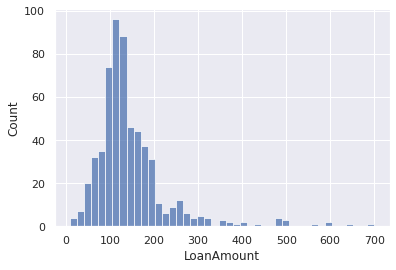

In [44]:
sns.set()
sns.histplot(data=df.LoanAmount)

In [45]:
df['LoanAmount_log'] = df['LoanAmount'].map(np.log)

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Count'>

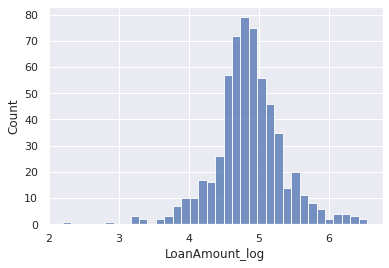

In [46]:
sns.histplot(data=df.LoanAmount_log) # success! transformed to a more normal distribution.

Combine both incomes as total income and take a log transformation of the same.

In [47]:
from scipy.stats import shapiro
stat, p = shapiro(df.LoanAmount_log)
alpha = 0.05
if p > alpha:
    print('Sample is Gaussian (fail to reject Shapiro-Wilk H0)')
else:
    print('Sample is not Gaussian (reject Shapiro-Wilk H0)')

# does NOT pass shapiro-wilk test for normalcy.

Sample is Gaussian (fail to reject Shapiro-Wilk H0)


In [48]:
df['TotalIncome'] = df.ApplicantIncome + df.CoapplicantIncome

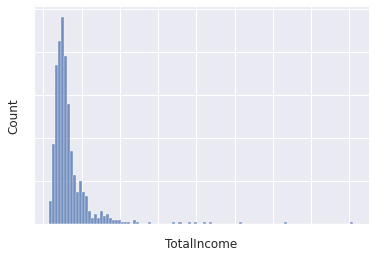

In [49]:
sns.histplot(data=df.TotalIncome).set(xticklabels=[], yticklabels=[])
sns.despine()
plt.savefig(f'TotalIncome_before.png')

In [50]:
df['TotalIncome_log'] = df['TotalIncome'].map(np.log)

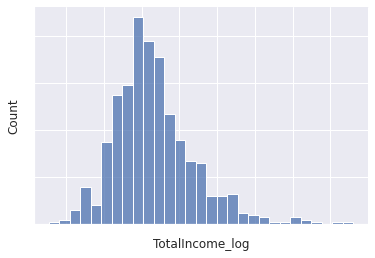

In [51]:
sns.histplot(data=df.TotalIncome_log).set(xticklabels=[], yticklabels=[])
sns.despine()
plt.savefig(f'TotalIncome_after.png')

In [52]:
stat, p = shapiro(df.TotalIncome_log)
alpha = 0.05
if p > alpha:
    print('Sample is Gaussian (fail to reject Shapiro-Wilk H0)')
else:
    print('Sample is not Gaussian (reject Shapiro-Wilk H0)')

# does NOT pass shapiro-wilk test for normalcy.
# proof of concept FIRST, ML list possible features that could improve

Sample is not Gaussian (reject Shapiro-Wilk H0)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

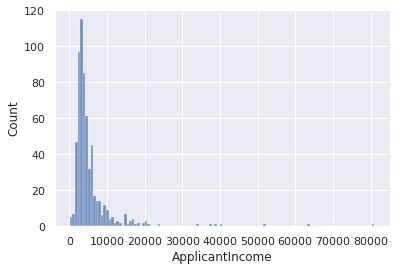

In [53]:
sns.histplot(data=df.ApplicantIncome)

In [54]:
df['ApplicantIncome_log'] = df.ApplicantIncome.map(np.log)

<AxesSubplot:xlabel='ApplicantIncome_log', ylabel='Count'>

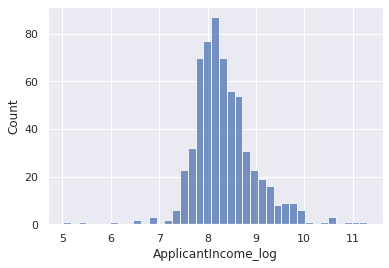

In [55]:
sns.histplot(data=df.ApplicantIncome_log)

In [56]:
def ft_engineer(df):
    
    import copy
    df = copy.deepcopy(df)
    
    try:
        df['LoanAmount_log'] = df['LoanAmount'].map(np.log)
        df['TotalIncome'] = df.ApplicantIncome + df.CoapplicantIncome
        df['TotalIncome_log'] = df['TotalIncome'].map(np.log)
        df['ApplicantIncome_log'] = df.ApplicantIncome.map(np.log) # try log this too

        df = df.drop(columns=['TotalIncome', 'LoanAmount', 'ApplicantIncome', 'Loan_ID'])
    except Exception:
        pass
    
    return df

In [57]:
df3 = ft_engineer(df2)

In [58]:
df3.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Female', 'Male', 'Unknown', 'Rural', 'Semiurban',
       'Urban', 'LoanAmount_log', 'TotalIncome_log', 'ApplicantIncome_log'],
      dtype='object')

MISC

In [59]:
# later rm_outliers? Loan_Amount_Term + CoapplicantIncome

In [60]:
#correlation between no history and history? (missing at random?) new cat (-1)?

In [61]:
def rm_outliers(df):
    df['CoapplicantIncome'] = df[df['CoapplicantIncome'] < 30000]

## 4. Building a Predictive Model

#### TEST TRAIN SPLIT

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df.drop(columns=['Loan_Status'])

In [64]:
y = df.Loan_Status

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [66]:
len(y_test)

62

#### PIPELINE & DEBUGGER

In [67]:
from sklearn.pipeline import Pipeline

In [68]:
# ADD CUSTOM DEBUGGER, TO CHECK INTERMEDIATE SHAPE
from sklearn.base import TransformerMixin, BaseEstimator

class Debug(BaseEstimator, TransformerMixin):
    '''Examine Shape part-way through Pipe'''
    

    def transform(self, X):
        print(X.shape)
        self.shape = shape
        # what other output you want
        return X

    def fit(self, X, y=None, **fit_params):
        return self
'''
#from sklearn.feature_extraction.text import TfidfVectorizer

pipe = Pipeline([
    ("tf_idf", TfidfVectorizer()),
    ("debug", Debug()),
    ("nmf", NMF())
])

pipe.fit_transform(data.test)
pipe.named_steps["debug"].shape
'''

'\n#from sklearn.feature_extraction.text import TfidfVectorizer\n\npipe = Pipeline([\n    ("tf_idf", TfidfVectorizer()),\n    ("debug", Debug()),\n    ("nmf", NMF())\n])\n\npipe.fit_transform(data.test)\npipe.named_steps["debug"].shape\n'

### PREPROCESSING

In [69]:
# PREPROCESSING
from sklearn.preprocessing import FunctionTransformer

replace_null = FunctionTransformer(fill_null)
one_hot = FunctionTransformer(encode_cat)
ft_eng = FunctionTransformer(ft_engineer)

In [70]:
from sklearn.pipeline import Pipeline, FeatureUnion

preprocesser = Pipeline(steps=[
    ('null', replace_null),
    ('cat', one_hot),
    ('features', ft_eng)
])

### FT SCALING/DENSE

In [71]:
from sklearn.preprocessing import OneHotEncoder
onehot_cat = OneHotEncoder()

In [72]:
# FT SCALING
from sklearn.preprocessing import StandardScaler
#from sklearn.base import TransformerMixin,BaseEstimator
#from scipy.sparse import csr_matrix

class ToDenseTransformer():

    # here you define the operation it should perform
    def transform(self, X, y=None, **fit_params):
        return X.todense()

    # just return self
    def fit(self, X, y=None, **fit_params):
        return self

In [73]:
test = ToDenseTransformer()

In [74]:
#test.transform(df)

In [75]:
ft_scaler = Pipeline(steps=[
    #('hot', onehot_cat),
    #('to_dense', ToDenseTransformer()),
    ('scaler', StandardScaler())
])

### FT SELECTION

In [76]:
# FT SELECTION
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

pca_select = PCA(n_components=3)
univ_select = SelectKBest(f_classif, k=5)

In [77]:
ft_selection = FeatureUnion([('pca', pca_select),
                                ('kbest', univ_select)])

#### FIND K-BEST VAR NAMES

In [78]:
x1 = fill_null(X_train)
x2 = encode_cat(x1)
x3 = ft_engineer(x2) # fts for selection

y1 = fill_null(y_train)
y2 = encode_cat(y1)
y3 = ft_engineer(y2) # target var

In [79]:
univ_select.fit(x3, y3)

SelectKBest(k=5)

In [80]:
feature_names = list(x3.columns.values)
mask = univ_select.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

In [81]:
new_features

['Married', 'Education', 'Credit_History', 'Rural', 'Semiurban']

### MODELS

In [82]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, ElasticNet
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### BASE ESTIMATOR

In [83]:
base_model = LogisticRegression()

In [84]:
model = Pipeline(steps=[
    ('preprocess', preprocesser),
    ('model', base_model)
])

In [85]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('null',
                                  FunctionTransformer(func=<function fill_null at 0x7f2c96be1790>)),
                                 ('cat',
                                  FunctionTransformer(func=<function encode_cat at 0x7f2c99018670>)),
                                 ('features',
                                  FunctionTransformer(func=<function ft_engineer at 0x7f2c96bdbdc0>))])),
                ('model', LogisticRegression())])

In [86]:
model.score(X_test, y_test)

0.7741935483870968

#### FINAL PIPE

In [87]:
# WITHOUT SCALE OR SELECTION
classifier = Pipeline(steps=[
    ('preprocess', preprocesser),
    ('classifier', base_model)
])

In [88]:
# WITH SCALE AND SELECTION
classifier = Pipeline(steps=[
    ('preprocess', preprocesser),
    ('scale', ft_scaler),
    ('ft_select', ft_selection),
    ('classifier', base_model)
])
# doesn't improve LogReg at all

### MODELING & TUNING

#### RANDOMIZED SEARCH

In [89]:
#rs_cv= RandomizedSearchCV(regressor, params, n_iter = 100, scoring=None, cv=5, verbose=0, refit=True)
#rs_cv.fit(X_train, Y_train.values.ravel())

#### GRID SEARCH

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'penalty': ['l1'], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga']},
  {'penalty': ['l2'], 'solver': ['newton-cg']},
 ]

In [91]:
params = [{
            'classifier': [LogisticRegression()],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__C' : np.logspace(-4, 4, 20),
            'classifier__solver' : ['liblinear']}]

In [92]:
LR_model = GridSearchCV(classifier, params, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [93]:
LR_model.score(X_test, y_test)

0.7903225806451613

In [94]:
LR_model.best_params_

{'classifier': LogisticRegression(C=1.623776739188721, solver='liblinear'),
 'classifier__C': 1.623776739188721,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [95]:
import pickle
pickle.dump(LR_model, open('LogReg.p', 'wb'))
#LR_pickle = pickle.load(open('LogReg.p', 'rb'))

### Tuning LogReg

In [96]:
base_model = LogisticRegression()

In [97]:
model = Pipeline(steps=[
    ('preprocess', preprocesser),
    ('model', base_model)
])

In [98]:
param_grid = [
  {
      'model__penalty': ['l1', 'l2', 'None'],
      'model__solver': [ 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
      'model__C': np.logspace(-4, 4, 20)
  }]

In [99]:
gridr = GridSearchCV(model, param_grid, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/home/aris/miniconda3/envs/lhl/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aris/miniconda3/envs/lhl/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/aris/miniconda3/envs/lhl/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/aris/miniconda3/envs/lhl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/aris/miniconda3/envs/lhl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' pe

KeyboardInterrupt: 

In [ ]:
gridr.best_params_

{'model__C': 11.288378916846883,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [ ]:
gridr.score(X_test, y_test)

0.7903225806451613

In [ ]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
rs_cv= RandomizedSearchCV(model, params, n_iter = 100, scoring=None, cv=5, verbose=0, refit=True)
rs_cv.fit(X_train, Y_train.values.ravel())

#### RF: RandomSearch

In [ ]:
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}
pprint(random_grid)

{'model__bootstrap': [True, False],
 'model__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'model__max_features': ['auto', 'sqrt', 'log2'],
 'model__min_samples_leaf': [1, 2, 4],
 'model__min_samples_split': [2, 5, 10],
 'model__n_estimators': [200,
                         400,
                         600,
                         800,
                         1000,
                         1200,
                         1400,
                         1600,
                         1800,
                         2000]}


In [ ]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
rf = RandomForestClassifier()

model = Pipeline(steps=[
    ('preprocess', preprocesser),
    ('model', rf)
])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=123, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              Pipeline(steps=[('null',
                                                               FunctionTransformer(func=<function fill_null at 0x7f0d31ca7af0>)),
                                                              ('cat',
                                                               FunctionTransformer(func=<function encode_cat at 0x7f0d31c7c820>)),
                                                              ('features',
                                                               FunctionTransformer(func=<function ft_engineer at 0x7f0d31f3a040>))])),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__max_dept

In [ ]:
rf_random.best_params_

{'model__n_estimators': 1800,
 'model__min_samples_split': 10,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': 40,
 'model__bootstrap': True}

In [ ]:
rf_random.best_score_

0.7481884057971016

#### RF: GridSearch

In [ ]:
len(list(range(1600,2000,20)))

20

In [ ]:
params = [{
            'classifier': [RandomForestClassifier()],
            'classifier__bootstrap': [True],
            'classifier__max_depth': [30, 40, 50],
            'classifier__max_features': ['sqrt'],
            'classifier__min_samples_leaf': [1, 2],
            'classifier__min_samples_split': [8, 10, 12],
            'classifier__n_estimators': list(range(1600,2000,20))
        }#,
        #{
        #    'classifier': [BernoulliNB()],
        #    'classifier__alpha': 2.0**np.arange(-6, +6)
        #}
        ]

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = GridSearchCV(classifier, params, verbose=1, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


KeyboardInterrupt: 

In [ ]:
import pickle
pickle.dump(rf, open('rf.p', 'wb'))
#LR_pickle = pickle.load(open('LogReg.p', 'rb'))

In [ ]:
#        {
#            'classifier': [RidgeClassifier()],
#            'classifier__alpha': [1,0.1,0.01,0.001,0.0001,0], 
#            'classifier__fit_intercept': [True, False], 
#            'classifier__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
#        },
#        {
#            'classifier': [ElasticNet()],
#            'classifier__alpha': [1,0.1,0.01,0.001,0.0001,0],
#            'classifier__l1_ratio': np.arange(0, 1, 0.01)
#        },

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
def clean(df):
    
    import copy
    
    all_cols = df.columns.tolist()
    df = copy.deepcopy(df) # original df
    df_no_null = df.dropna()
    df_2null = df[df.isnull().sum(axis=1) > 2] # df of rows with >= Null vals
    num = [] # numeric cols
    fill_mean = [] # cols filled with mean value
    cat = [] # categorical cols
    null_cols = df.columns[df.isnull().any()].tolist() # cols with >= 1 Null val
    
    #df = df.dropna(thresh=(len(df.columns)-1)) # remove rows with >= 2 Null vals
    #print(f'removed {len(df_2null)} rows that had >1 null val')
    
    # null handling
    for col in null_cols:
        if (df[col].dtypes != 'object'):
            df[col] = df[col].fillna(value=np.median(df[col])) # if numeric, try filling null with median
            num += col
            if (df[col].isnull().any()) & (df[col].nunique() == 2): # if median was NaN value and col is binary - fill null with most common val
                df[col] = df[col].fillna(value=(df[col].value_counts().idxmax()))
            else:
                df[col] = df[col].fillna(value=np.mean(df[col])) # if median was Nan and col is NOT-binary - fill null with mean val
                fill_mean += col
        else:
            if (df[col].nunique() == 2):
                df[col] = df[col].fillna(value=(df[col].value_counts().idxmax()))
                print(col)
        
        '''    
            else:
                # swap Na for cat values predicted by LogReg
                from sklearn.linear_model import LogisticRegression
                logreg = LogisticRegression()
                
                # training data
                train_X = df_no_null[all_cols.remove(col)]
                train_y = df_no_null[col]
                
                # fit model
                logreg.fit(train_X, train_y)
                
                # test data
                test_X = df_null[all_cols.remove(col)]
                
                # swap NAs for predicted vals
                pred[col] = pd.DataFrame(logreg.predict(test_X))
                df[col] = df[col].fillna(pred[col])
        '''
    return df, fill_mean
                